# Bibliotecas

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import geopandas as gpd


In [2]:
pd.set_option('display.max.colwidth', None, 'display.max_rows', None, 'display.max_columns', None)
np.set_printoptions(threshold=np.inf)

## Entendimento das Bases

## Dados Geográficos

In [3]:
mapa = gpd.read_file("bases_mapa/PE_Municipios_2023.shp")
mapa.head(1)

CD_MUN        NM_MUN  CD_RGI  NM_RGI CD_RGINT NM_RGINT CD_UF       NM_UF  \
0  2600054  Abreu e Lima  260001  Recife     2601   Recife    26  Pernambuco   

  CD_REGIAO NM_REGIAO CD_CONCURB NM_CONCURB  AREA_KM2  \
0         2  Nordeste    2611606  Recife/PE   126.384   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

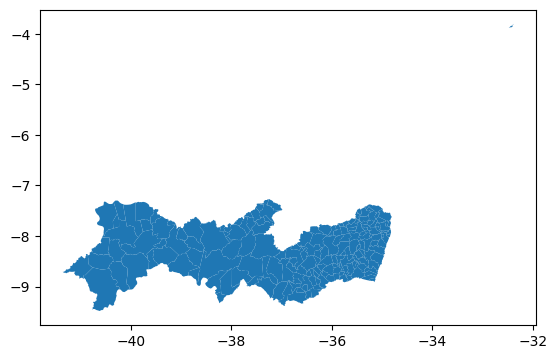

In [4]:
mapa.plot()
plt.show()

## Censo de Pernambuco

In [5]:
censo = pd.read_csv('censo.csv.gz')
censo.head()

,id_municipio,cor_raca,sexo,grupo_idade,alfabetizacao,populacao
0,1100023,Indígena,Homens,15 a 19 anos,Não alfabetizadas,NaN
1,1100262,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
2,1101005,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
3,1101435,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
4,1101435,Indígena,Mulheres,15 a 19 anos,Não alfabetizadas,NaN


In [6]:
ids = pd.read_csv('idmunicipio.csv.gz')
ids.head()

,id_municipio,id_municipio_6,id_municipio_tse,id_municipio_rf,id_municipio_bcb,nome,capital_uf,id_comarca,id_regiao_saude,nome_regiao_saude,id_regiao_imediata,nome_regiao_imediata,id_regiao_intermediaria,nome_regiao_intermediaria,id_microrregiao,nome_microrregiao,id_mesorregiao,nome_mesorregiao,id_regiao_metropolitana,nome_regiao_metropolitana,ddd,id_uf,sigla_uf,nome_uf,nome_regiao,amazonia_legal,centroide
0,1100338,110033,434,47,44516,Nova Mamoré,0,1100106,11004,Madeira-Mamoré,110001,Porto Velho,1101,Porto Velho,11001,Porto Velho,1101,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-64.6295025002404 -10.3822863210755)
1,1100205,110020,35,3,30719,Porto Velho,1,1100205,11004,Madeira-Mamoré,110001,Porto Velho,1101,Porto Velho,11001,Porto Velho,1101,Madeira-Guaporé,101,Região Metropolitana de Porto Velho,69,11,RO,Rondônia,Norte,1,POINT(-64.3041357999869 -9.15394033687075)
2,1101104,110110,493,683,46851,Itapuã do Oeste,0,1100205,11004,Madeira-Mamoré,110001,Porto Velho,1101,Porto Velho,11001,Porto Velho,1101,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-63.044960463046 -9.17019402601564)
3,1100809,110080,477,681,46961,Candeias do Jamari,0,1100205,11004,Madeira-Mamoré,110001,Porto Velho,1101,Porto Velho,11001,Porto Velho,1101,Madeira-Guaporé,101,Região Metropolitana de Porto Velho,69,11,RO,Rondônia,Norte,1,POINT(-63.3254198532114 -8.88702392955617)
4,1100940,110094,680,8,56652,Cujubim,0,1100023,11001,Vale do Jamari,110002,Ariquemes,1101,Porto Velho,11001,Porto Velho,1101,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-62.5652673033848 -9.1709863446154)


In [7]:
# Filtrar censo para estado de Pernambuco
ids_pernambuco = ids.loc[ids['sigla_uf']=='PE']
municipios = (ids_pernambuco['id_municipio']).tolist()

censo_pe = censo.loc[censo['id_municipio'].isin(municipios)]
censo_pe.head()

,id_municipio,cor_raca,sexo,grupo_idade,alfabetizacao,populacao
238,2607307,Indígena,Homens,15 a 19 anos,Não alfabetizadas,NaN
239,2603405,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
240,2603405,Indígena,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
241,2607109,Preta,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
242,2612802,Amarela,Homens,15 a 19 anos,Alfabetizadas,NaN


In [8]:
# Deletar tabela anterior que não será mais usada
import gc
del censo
gc.collect()

3587

In [9]:
censo_pe.shape

(25900, 6)

In [10]:
censo_pe.isna().sum()

id_municipio        0
cor_raca            0
sexo                0
grupo_idade         0
alfabetizacao       0
populacao        6056
dtype: int64

In [11]:
dados_censo = censo_pe.merge(ids[['nome', 'id_municipio']], on='id_municipio')
dados_censo.head()

,id_municipio,cor_raca,sexo,grupo_idade,alfabetizacao,populacao,nome
0,2607307,Indígena,Homens,15 a 19 anos,Não alfabetizadas,NaN,Ipubi
1,2603405,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN,Calumbi
2,2603405,Indígena,Mulheres,15 a 19 anos,Não alfabetizadas,NaN,Calumbi
3,2607109,Preta,Mulheres,15 a 19 anos,Não alfabetizadas,NaN,Ingazeira
4,2612802,Amarela,Homens,15 a 19 anos,Alfabetizadas,NaN,Santa Terezinha


## Resultados da Eleição em Pernambuco de 2022

In [12]:
import csv

votos = pd.read_csv('votacao.csv', quoting=csv.QUOTE_NONE, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')
votos.head()

,"""DT_GERACAO""","""HH_GERACAO""","""ANO_ELEICAO""","""CD_TIPO_ELEICAO""","""NM_TIPO_ELEICAO""","""NR_TURNO""","""CD_ELEICAO""","""DS_ELEICAO""","""DT_ELEICAO""","""TP_ABRANGENCIA""","""SG_UF""","""SG_UE""","""NM_UE""","""CD_MUNICIPIO""","""NM_MUNICIPIO""","""NR_ZONA""","""NR_SECAO""","""CD_CARGO""","""DS_CARGO""","""NR_VOTAVEL""","""NM_VOTAVEL""","""QT_VOTOS""","""NR_LOCAL_VOTACAO""","""SQ_CANDIDATO""","""NM_LOCAL_VOTACAO""","""DS_LOCAL_VOTACAO_ENDERECO"""
0,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""","""PE""","""PE""","""PERNAMBUCO""","""24570""","""JABOATÃO DOS GUARARAPES""","""147""","""336""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""2""","""1457""","""170001610736""","""ESCOLA MUNICIPAL NATIVIDADE SALDANHA""","""RUA DO FUTURO, S/N"""
1,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""","""PE""","""PE""","""PERNAMBUCO""","""24279""","""GRAVATÁ""","""30""","""152""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1112""","""170001610736""","""ESCOLA DE REFERÊNCIA EM ENSINO MÉDIO PROF. ANTONIO FARIAS - EREMPAF""","""RUA QUINTINO BOCAIUVA, SN"""
2,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""","""PE""","""PE""","""PERNAMBUCO""","""24350""","""IGARASSU""","""85""","""25""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1066""","""170001610736""","""ESCOLA ESTADUAL JOÃO PESSOA GUERRA""","""RUA ALFREDO BANDEIRA DE MELO, S/N"""
3,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""","""PE""","""PE""","""PERNAMBUCO""","""25313""","""RECIFE""","""8""","""281""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1759""","""170001610736""","""COLÉGIO TRIUNFO""","""R. DO TRIUNFO, 647"""
4,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""","""PE""","""PE""","""PERNAMBUCO""","""23795""","""CARPINA""","""20""","""96""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1171""","""170001610736""","""COLÉGIO SALESIANO""","""AV. PADRE ROCHA, 500"""


In [13]:
votos_deputado = votos.loc[votos['"DS_CARGO"']=='"DEPUTADO FEDERAL"']
print(f"No total, a base possui {len(votos)} votos, sendo {len(votos_deputado)} para Deputado Federal.")

No total, a base possui 2740379 votos, sendo 1118705 para Deputado Federal.


In [14]:
del votos
gc.collect()

0

In [15]:
to_drop = ['"ANO_ELEICAO"', '"CD_TIPO_ELEICAO"', '"NM_TIPO_ELEICAO"', '"NR_TURNO"', '"CD_ELEICAO"',
'"DS_ELEICAO"','"DT_ELEICAO"', '"TP_ABRANGENCIA"', '"SG_UF"', '"SG_UE"', '"NM_UE"',
'"CD_CARGO"', '"DS_CARGO"', '"DT_GERACAO"']

votos_deputado = votos_deputado.drop(columns=(to_drop))

for col in votos_deputado.columns:
    if votos_deputado[col].dtype == 'object':
        votos_deputado[col] = votos_deputado[col].str.replace('"', '', regex=False)

votos_deputado.columns = votos_deputado.columns.str.replace('"', '', regex=False)

votos_deputado['QT_VOTOS'] = votos_deputado['QT_VOTOS'].astype(int)

votos_deputado.columns

Index(['HH_GERACAO', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
       'SQ_CANDIDATO', 'NM_LOCAL_VOTACAO', 'DS_LOCAL_VOTACAO_ENDERECO'],
      dtype='object')

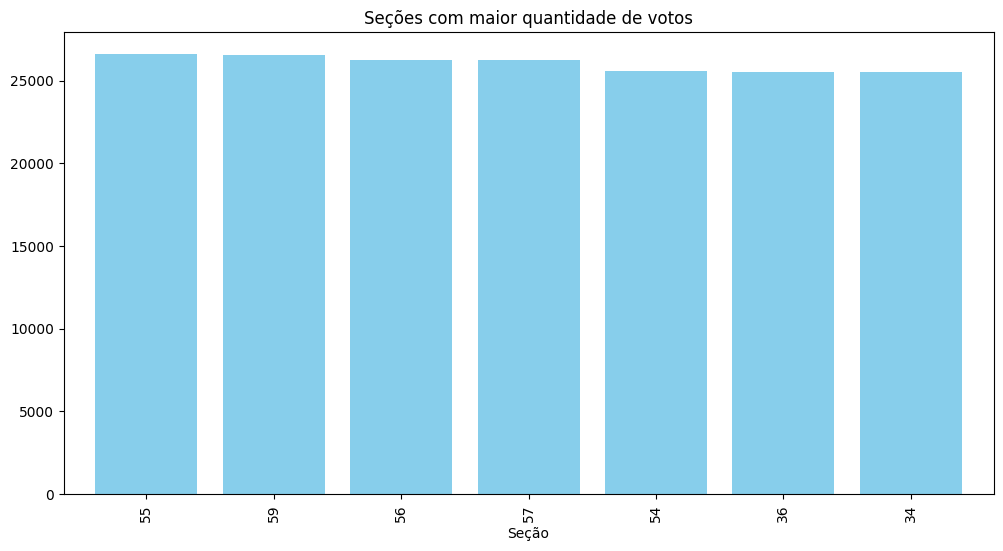

In [16]:
votos_secao = votos_deputado.groupby('NR_SECAO')['QT_VOTOS'].sum().sort_values(ascending=False)
maisvotos = votos_secao.head(7)
plt.figure(figsize=(12,6))
maisvotos.plot(kind='bar', width=0.8, color='skyblue')
plt.title("Seções com maior quantidade de votos")
plt.xlabel("Seção")
plt.show()

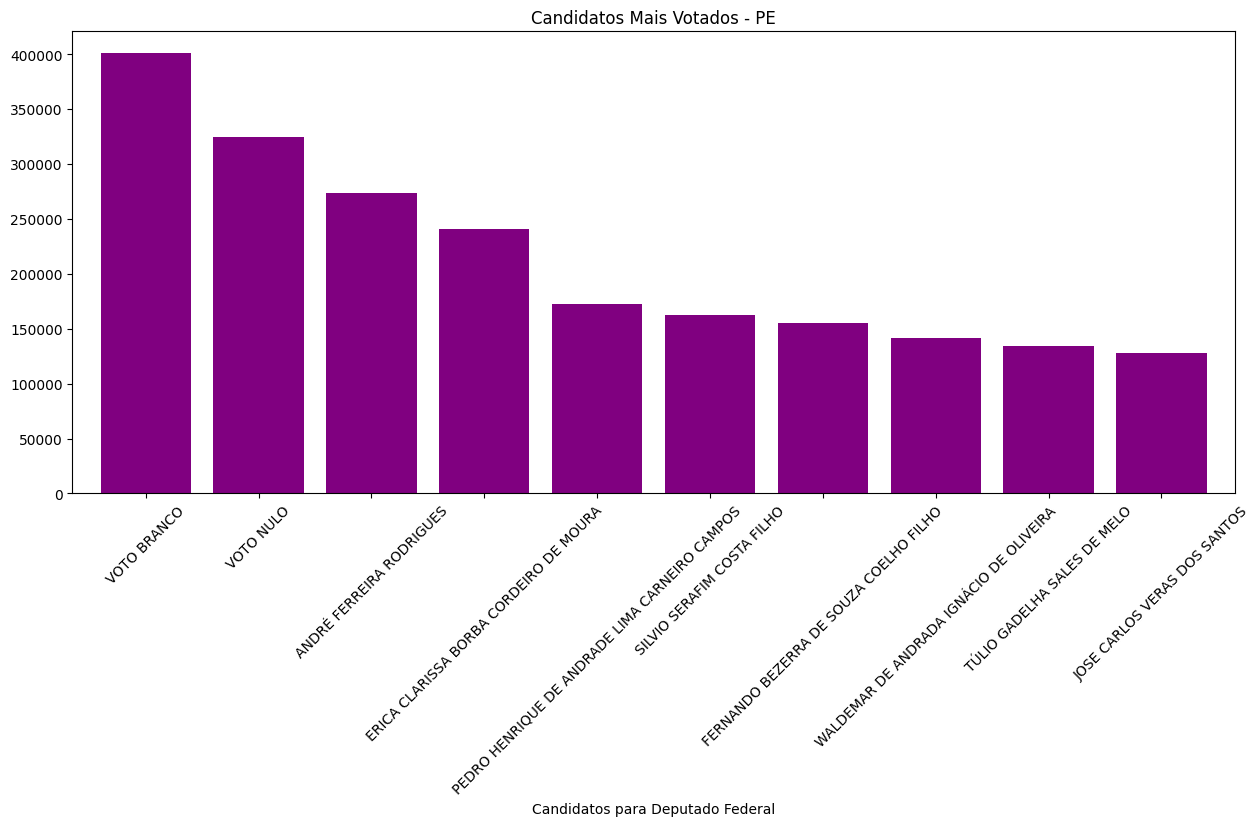

In [17]:
votos_candidatos = votos_deputado.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().sort_values(ascending=False)
candidatos_mais_votados = votos_candidatos.head(10)

plt.figure(figsize=(15,6))
candidatos_mais_votados.plot(kind='bar', width=0.8, color='purple')
plt.title('Candidatos Mais Votados - PE')
plt.xlabel("Candidatos para Deputado Federal")
plt.xticks(rotation=45)
plt.show()

# Engenharia de Dados

In [18]:
votos_deputado.columns

Index(['HH_GERACAO', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
       'SQ_CANDIDATO', 'NM_LOCAL_VOTACAO', 'DS_LOCAL_VOTACAO_ENDERECO'],
      dtype='object')

In [19]:
votos_deputado['NM_VOTAVEL'].nunique()

466

In [20]:
votos_candidatos.head(12)

NM_VOTAVEL
VOTO BRANCO                                       400687
VOTO NULO                                         324967
ANDRÉ FERREIRA RODRIGUES                          273267
ERICA CLARISSA BORBA CORDEIRO DE MOURA            240511
PEDRO HENRIQUE DE ANDRADE LIMA CARNEIRO CAMPOS    172526
SILVIO SERAFIM COSTA FILHO                        162056
FERNANDO BEZERRA DE SOUZA COELHO FILHO            155305
WALDEMAR DE ANDRADA IGNÁCIO DE OLIVEIRA           141386
TÚLIO GADELHA SALES DE MELO                       134391
JOSE CARLOS VERAS DOS SANTOS                      127482
EDUARDO HENRIQUE DA FONTE DE ALBUQUERQUE SILVA    124850
CLODOALDO MAGALHÃES OLIVEIRA LYRA                 110620
Name: QT_VOTOS, dtype: int64

In [21]:
direita = ['ANDRÉ FERREIRA RODRIGUES', 'ERICA CLARISSA BORBA CORDEIRO DE MOURA', 'SILVIO SERAFIM COSTA FILHO', 'FERNANDO BEZERRA DE SOUZA COELHO FILHO', 'EDUARDO HENRIQUE DA FONTE DE ALBUQUERQUE SILVA']
centro = ['PEDRO HENRIQUE DE ANDRADE LIMA CARNEIRO CAMPOS', 'WALDEMAR DE ANDRADA IGNÁCIO DE OLIVEIRA', 'TÚLIO GADELHA SALES DE MELO', 'IZA ARRUDA']
esquerda = ['JOSE CARLOS VERAS DOS SANTOS', 'CLODOALDO MAGALHÃES OLIVEIRA LYRA']

In [22]:
votos_deputado = votos_deputado[['CD_MUNICIPIO', 'NM_VOTAVEL', 'QT_VOTOS']]

In [23]:
votos_deputado.head()

,CD_MUNICIPIO,NM_VOTAVEL,QT_VOTOS
11,25313,ARISTOTELES FERREIRA DUTRA,2
12,24910,ARISTOTELES FERREIRA DUTRA,2
19,25313,ARISTOTELES FERREIRA DUTRA,3
20,25313,ARISTOTELES FERREIRA DUTRA,1
26,25313,ARISTOTELES FERREIRA DUTRA,5


In [24]:
votos_municipio = votos_deputado.groupby(['CD_MUNICIPIO', 'NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()
votos_municipio['esquerda'] = np.zeros(votos_municipio.shape[0])
votos_municipio['direita'] = np.zeros(votos_municipio.shape[0])
votos_municipio['centro'] = np.zeros(votos_municipio.shape[0])

def partidos(row):
    if(row['NM_VOTAVEL'].isin(esquerda)):
        row['esquerda']+=1
    elif(row['NM_VOTAVEL'].isin(direita)):
        row['direita']+=1
    elif(row['NM_VOTAVEL'].isin(centro)):
        row['centro']+=19

votos_municipio.head()

,CD_MUNICIPIO,NM_VOTAVEL,QT_VOTOS,esquerda,direita,centro
0,23000,ALEXANDRE SENA DE ALMEIDA,2,0.0,0.0,0.0
1,23000,ALINE LEMOS CORRÊA DE OLIVEIRA ANDRADE,1,0.0,0.0,0.0
2,23000,ANA KARLA PEREIRA DA SILVA NEVES DE SOUZA,1,0.0,0.0,0.0
3,23000,ANDREZA BANDEIRA FERREIRA DE OLIVEIRA MELO,3,0.0,0.0,0.0
4,23000,ANDRÉ FERREIRA RODRIGUES,79,0.0,0.0,0.0


In [33]:
votos_municipio['esquerda'] = votos_municipio['NM_VOTAVEL'].apply(lambda x: 1 if x in esquerda else 0)
votos_municipio['direita'] = votos_municipio['NM_VOTAVEL'].apply(lambda x: 1 if x in direita else 0)
votos_municipio['centro'] = votos_municipio['NM_VOTAVEL'].apply(lambda x: 1 if x in centro else 0)

In [34]:
resumo_politico = votos_municipio.groupby('CD_MUNICIPIO')[['esquerda', 'direita', 'centro']].sum()
resumo_politico = resumo_politico.astype(int)
resumo_politico.head()

,esquerda,direita,centro
CD_MUNICIPIO,,,
23000,2,4,3
23019,2,5,3
23027,2,5,3
23035,2,5,3
23043,2,5,3


## Merge

In [26]:
traducao = pd.read_csv('municipios_brasileiros_tse.csv')
traducao = traducao.loc[traducao['uf']=='PE']

In [27]:
traducao = traducao[['codigo_tse', 'codigo_ibge']]
traducao = traducao.rename(columns={'codigo_tse':'CD_MUNICIPIO', 'codigo_ibge':'id_municipio'})
traducao.head()

,CD_MUNICIPIO,id_municipio
2785,26310,2600054
2786,23019,2600104
2787,23035,2600203
2788,23051,2600302
2789,23116,2600609


In [28]:
votos_deputado['CD_MUNICIPIO'] = votos_deputado['CD_MUNICIPIO'].astype(int)
tse_merge = votos_deputado.merge(traducao, on='CD_MUNICIPIO')

: 

In [ ]:
df_merged = tse_merge.merge(censo_pe, on='id_municipio')
df_merged.head()